In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
#import cv2
!pip install joypy
import joypy
import seaborn as sns

In [2]:
data_csv_path_train = "/kaggle/input/csiro-biomass/train.csv"
data_csv_path_test = "data/test.csv"

In [3]:
train_df = pd.read_csv(data_csv_path_train)
train_df['image_path'] = "/kaggle/input/csiro-biomass/" + train_df['image_path']

In [4]:
train_df

,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,/kaggle/input/csiro-biomass/train/ID1011485656...,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,/kaggle/input/csiro-biomass/train/ID1011485656...,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,/kaggle/input/csiro-biomass/train/ID1011485656...,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,/kaggle/input/csiro-biomass/train/ID1011485656...,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,/kaggle/input/csiro-biomass/train/ID1011485656...,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750
...,...,...,...,...,...,...,...,...,...
1780,ID983582017__Dry_Clover_g,/kaggle/input/csiro-biomass/train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Clover_g,0.0000
1781,ID983582017__Dry_Dead_g,/kaggle/input/csiro-biomass/train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Dead_g,0.0000
1782,ID983582017__Dry_Green_g,/kaggle/input/csiro-biomass/train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Green_g,40.9400
1783,ID983582017__Dry_Total_g,/kaggle/input/csiro-biomass/train/ID983582017.jpg,2015/9/1,WA,Ryegrass,0.64,9.0000,Dry_Total_g,40.9400


In [5]:
species = np.unique(train_df['Species'])
species

array(['Clover', 'Fescue', 'Fescue_CrumbWeed', 'Lucerne', 'Mixed',
       'Phalaris',
       'Phalaris_BarleyGrass_SilverGrass_SpearGrass_Clover_Capeweed',
       'Phalaris_Clover',
       'Phalaris_Clover_Ryegrass_Barleygrass_Bromegrass',
       'Phalaris_Ryegrass_Clover', 'Ryegrass', 'Ryegrass_Clover',
       'SubcloverDalkeith', 'SubcloverLosa', 'WhiteClover'], dtype=object)

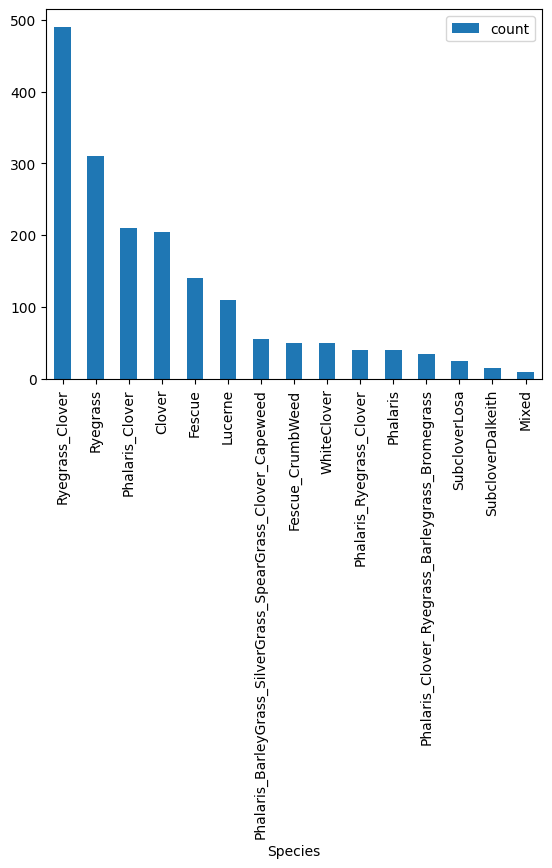

In [6]:
species_dist = pd.DataFrame(train_df['Species'].value_counts()).plot(kind = 'bar')

#plt.figure(figsize = (15,8))
#plt.bar(species, species_dist['count'])

In [7]:
train_pivotted = train_df.pivot(
    index=["image_path", "Sampling_Date", "State", 'Pre_GSHH_NDVI', 'Height_Ave_cm', 'Species'],
    columns="target_name",
    values="target",
).reset_index()

train_pivotted

target_name,image_path,Sampling_Date,State,Pre_GSHH_NDVI,Height_Ave_cm,Species,Dry_Clover_g,Dry_Dead_g,Dry_Green_g,Dry_Total_g,GDM_g
0,/kaggle/input/csiro-biomass/train/ID1011485656...,2015/9/4,Tas,0.62,4.6667,Ryegrass_Clover,0.0000,31.9984,16.2751,48.2735,16.2750
1,/kaggle/input/csiro-biomass/train/ID1012260530...,2015/4/1,NSW,0.55,16.0000,Lucerne,0.0000,0.0000,7.6000,7.6000,7.6000
2,/kaggle/input/csiro-biomass/train/ID1025234388...,2015/9/1,WA,0.38,1.0000,SubcloverDalkeith,6.0500,0.0000,0.0000,6.0500,6.0500
3,/kaggle/input/csiro-biomass/train/ID1028611175...,2015/5/18,Tas,0.66,5.0000,Ryegrass,0.0000,30.9703,24.2376,55.2079,24.2376
4,/kaggle/input/csiro-biomass/train/ID1035947949...,2015/9/11,Tas,0.54,3.5000,Ryegrass,0.4343,23.2239,10.5261,34.1844,10.9605
...,...,...,...,...,...,...,...,...,...,...,...
352,/kaggle/input/csiro-biomass/train/ID975115267.jpg,2015/7/8,WA,0.73,3.0000,Clover,40.0300,0.0000,0.8000,40.8300,40.8300
353,/kaggle/input/csiro-biomass/train/ID978026131.jpg,2015/9/4,Tas,0.83,3.1667,Clover,24.6445,4.1948,12.0601,40.8994,36.7046
354,/kaggle/input/csiro-biomass/train/ID980538882.jpg,2015/2/24,NSW,0.69,29.0000,Phalaris,0.0000,1.1457,91.6543,92.8000,91.6543
355,/kaggle/input/csiro-biomass/train/ID980878870.jpg,2015/7/8,WA,0.74,2.0000,Clover,32.3575,0.0000,2.0325,34.3900,34.3900


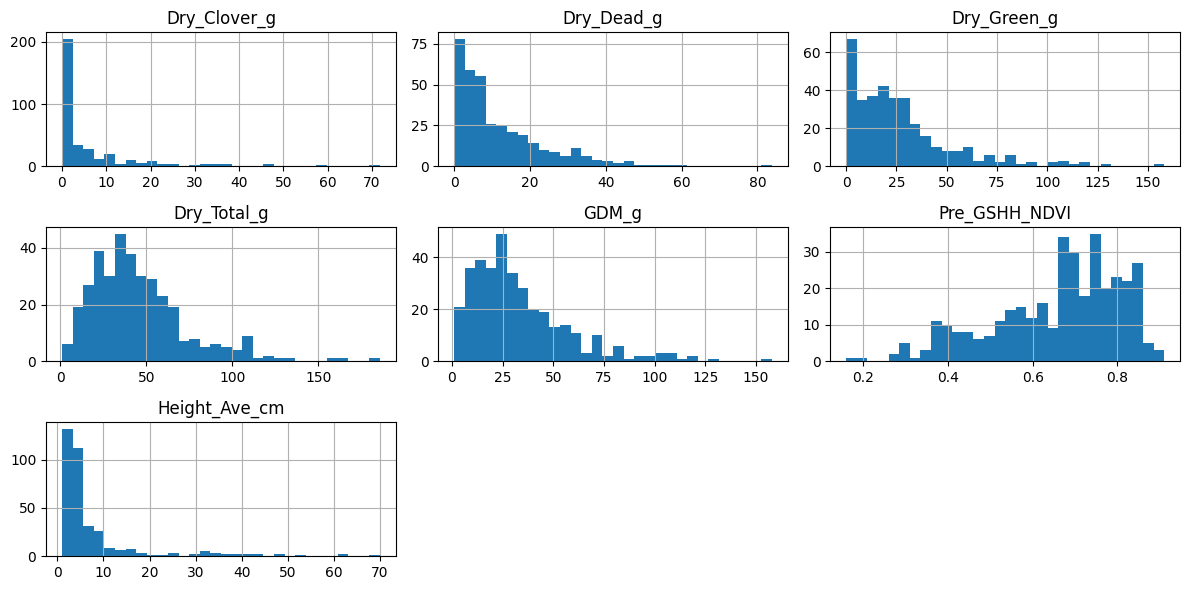

In [8]:
target_cols = ["Dry_Clover_g", "Dry_Dead_g", "Dry_Green_g", "Dry_Total_g", "GDM_g", 'Pre_GSHH_NDVI', 'Height_Ave_cm']
train_pivotted[target_cols].hist(bins=30, figsize=(12,6))
plt.tight_layout()
plt.ylabel("grams")
plt.show()

<Figure size 800x800 with 0 Axes>

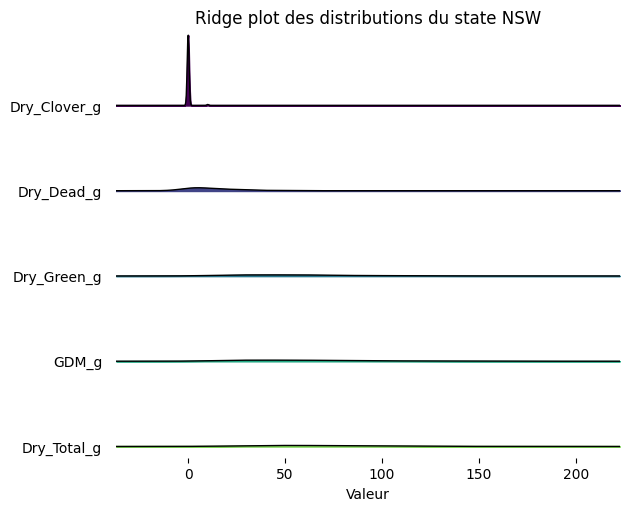

<Figure size 800x800 with 0 Axes>

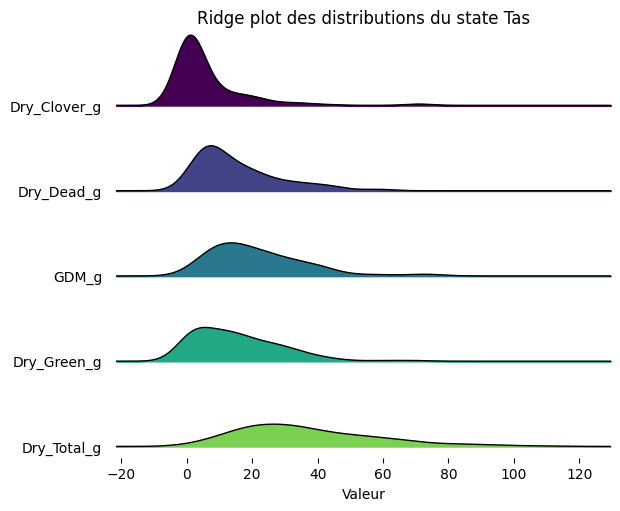

<Figure size 800x800 with 0 Axes>

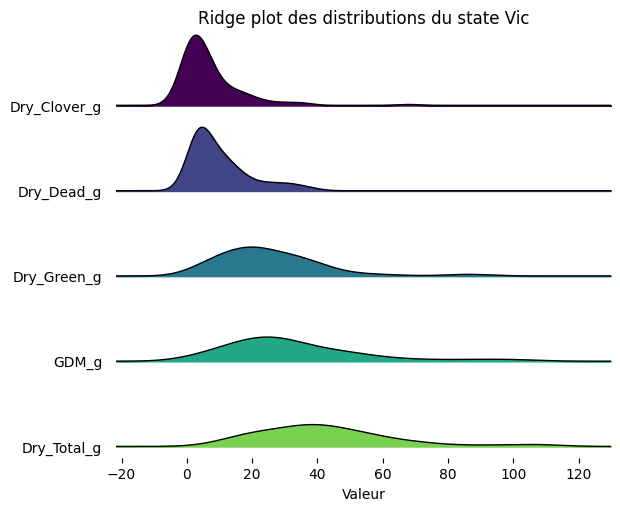

<Figure size 800x800 with 0 Axes>

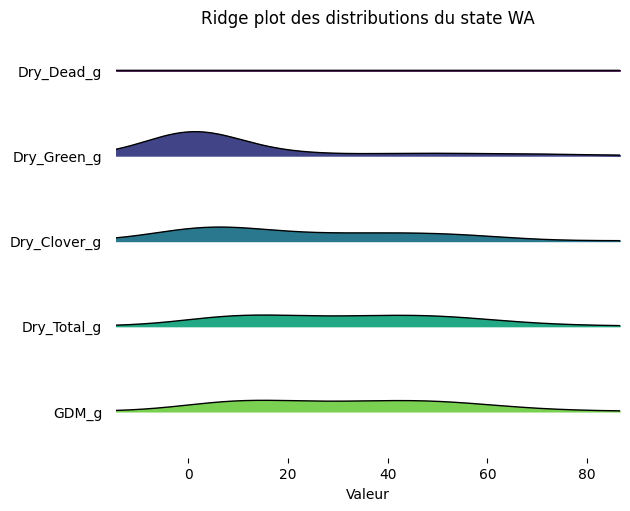

In [9]:
states = np.unique(train_pivotted['State'])
target_cols = ["Dry_Clover_g", "Dry_Dead_g", "Dry_Green_g", "Dry_Total_g", "GDM_g"]

for state in states:
    df = train_pivotted.loc[train_pivotted['State'] == state]
    df = df[target_cols]
    iqr = df.quantile(0.75) - df.quantile(0.25)
    order = iqr.sort_values().index
    
    plt.figure(figsize=(8, 8))
    joypy.joyplot(
        df[order],
        overlap=0,          # pas de chevauchement
        linewidth=1,
        colormap=plt.cm.viridis
    )
    
    plt.xlabel("Valeur")
    plt.title(f"Ridge plot des distributions du state {state}")
    plt.show()

/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 800x500 with 0 Axes>

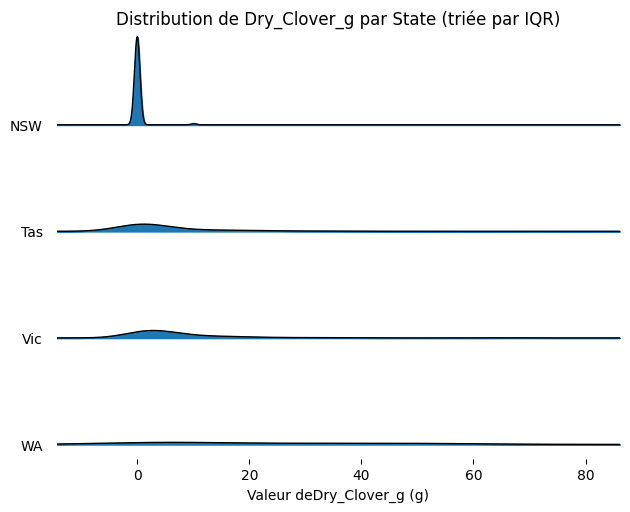

/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 800x500 with 0 Axes>

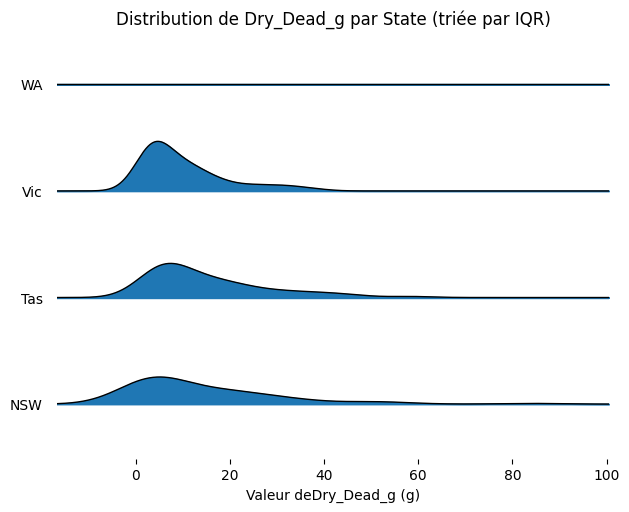

/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 800x500 with 0 Axes>

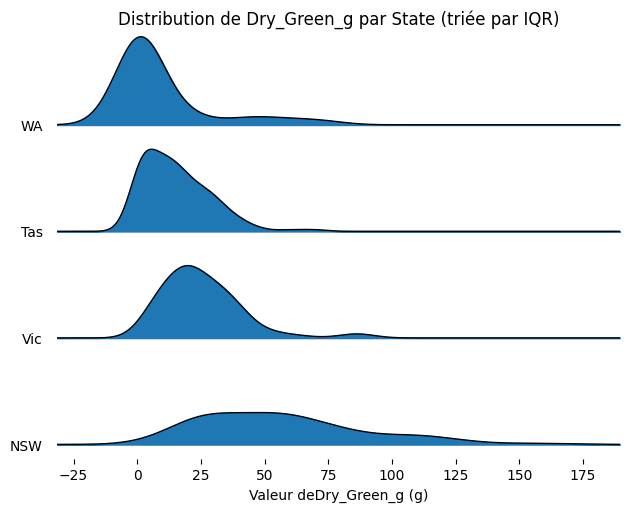

/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 800x500 with 0 Axes>

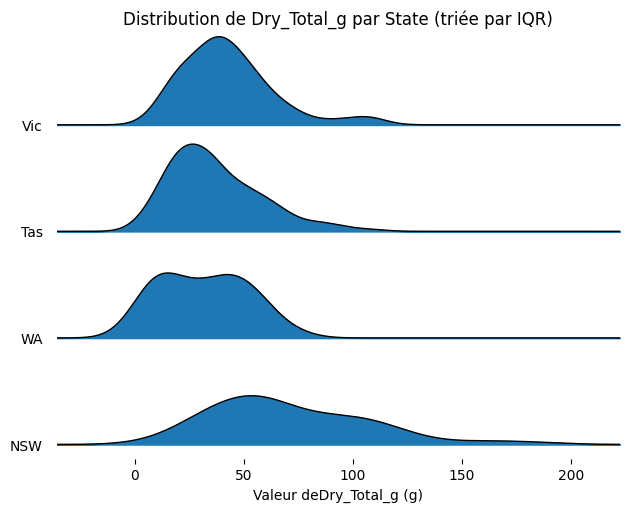

/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 800x500 with 0 Axes>

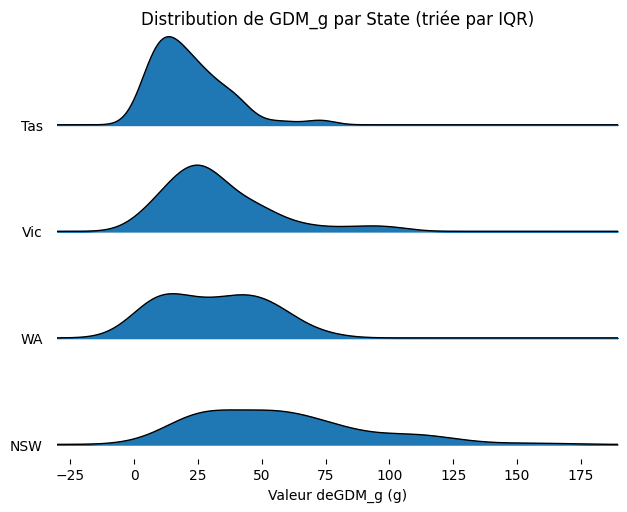

/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 800x500 with 0 Axes>

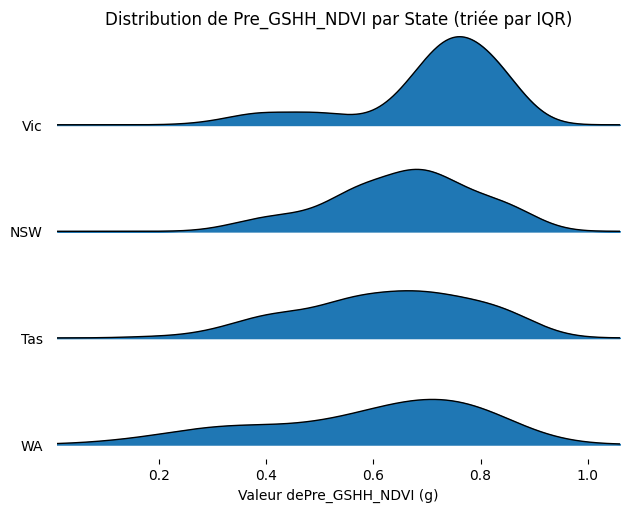

/usr/local/lib/python3.11/dist-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


<Figure size 800x500 with 0 Axes>

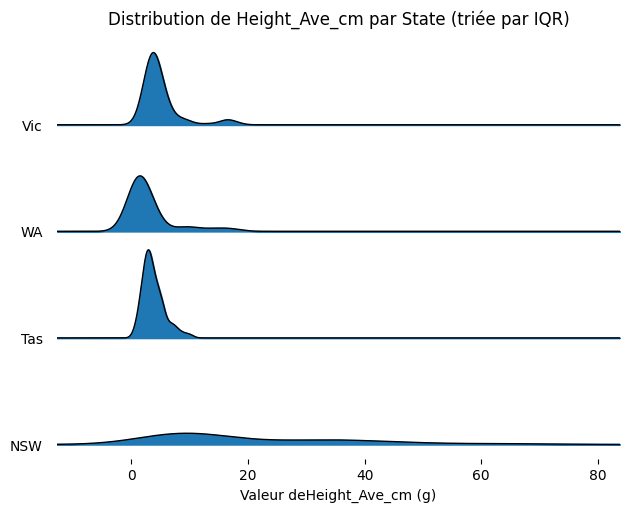

In [10]:
cols = ["State", "Dry_Clover_g", "Dry_Dead_g", "Dry_Green_g", "Dry_Total_g", "GDM_g", 'Pre_GSHH_NDVI', 'Height_Ave_cm']
target_cols = ["Dry_Clover_g", "Dry_Dead_g", "Dry_Green_g", "Dry_Total_g", "GDM_g", 'Pre_GSHH_NDVI', 'Height_Ave_cm']
df = train_pivotted[cols]

for target in target_cols:

    stats = df.groupby("State")[target].agg(
        q25=lambda x: x.quantile(0.25),
        q75=lambda x: x.quantile(0.75)
    )
    stats["iqr"] = stats["q75"] - stats["q25"]

    order = stats.sort_values("iqr").index.tolist()


    df_plot = df.copy()
    df_plot["State"] = pd.Categorical(
        df_plot["State"],
        categories=order,
        ordered=True
    )


    plt.figure(figsize=(8, 5))
    joypy.joyplot(
        data=df_plot,
        by="State",
        column=target,
        overlap=0,
        linewidth=1
    )

    plt.xlabel(f"Valeur de{target} (g)")
    plt.title(f"Distribution de {target} par State (triée par IQR)")
    plt.show()

<Axes: xlabel='target_name', ylabel='target_name'>

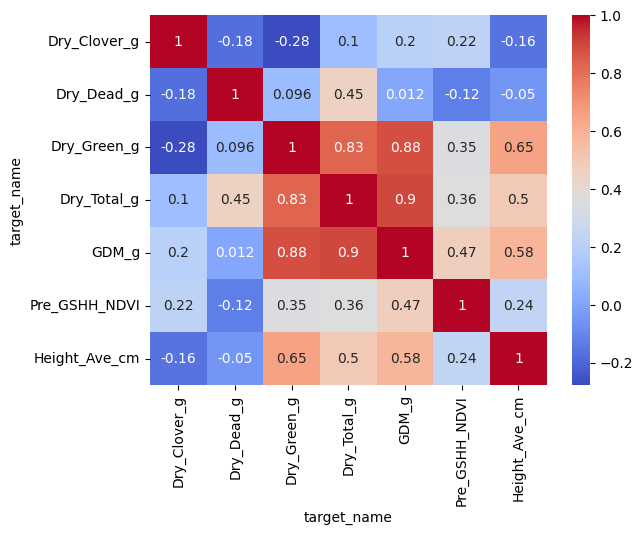

In [9]:
sns.heatmap(train_pivotted[target_cols].corr(), annot=True, cmap="coolwarm")

In [10]:
train_pivotted[target_cols].corr()

target_name,Dry_Clover_g,Dry_Dead_g,Dry_Green_g,Dry_Total_g,GDM_g,Pre_GSHH_NDVI,Height_Ave_cm
target_name,,,,,,,
Dry_Clover_g,1.000000,-0.175548,-0.276582,0.104185,0.204213,0.224150,-0.160138
Dry_Dead_g,-0.175548,1.000000,0.095554,0.453912,0.012028,-0.122818,-0.049721
Dry_Green_g,-0.276582,0.095554,1.000000,0.830315,0.884257,0.351054,0.648439
Dry_Total_g,0.104185,0.453912,0.830315,1.000000,0.896441,0.361291,0.497226
GDM_g,0.204213,0.012028,0.884257,0.896441,1.000000,0.466534,0.582722
Pre_GSHH_NDVI,0.224150,-0.122818,0.351054,0.361291,0.466534,1.000000,0.238434
Height_Ave_cm,-0.160138,-0.049721,0.648439,0.497226,0.582722,0.238434,1.000000


(2000, 1000)
(2000, 1000)


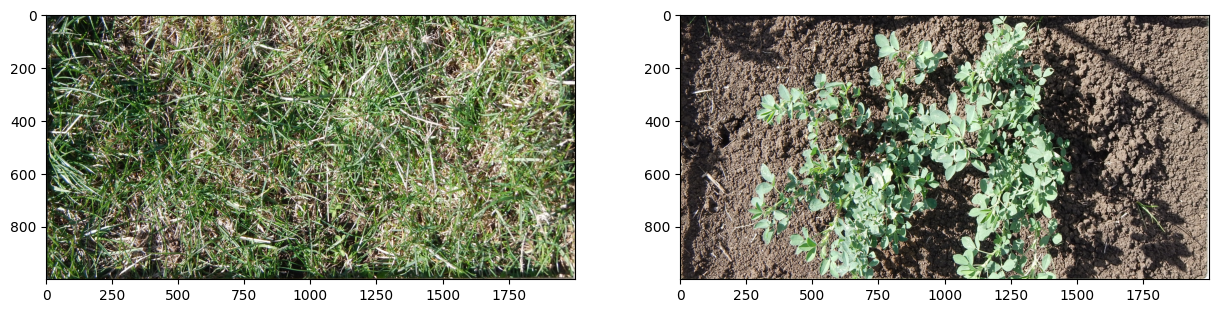

In [12]:
f, axarr = plt.subplots(1,2) 
f.set_figheight(15)
f.set_figwidth(15)
for i in range(2):
    img = Image.open(train_pivotted['image_path'].iloc[i])
    print(img.size)
    axarr[i].imshow(img)

In [13]:
df.describe()

target_name,Dry_Clover_g,Dry_Dead_g,Dry_Green_g,Dry_Total_g,GDM_g,Pre_GSHH_NDVI,Height_Ave_cm
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,6.649692,12.044548,26.624722,45.318097,33.274414,0.657423,7.595985
std,12.117761,12.402007,25.401232,27.984015,24.935822,0.152142,10.285262
min,0.000000,0.000000,0.000000,1.040000,1.040000,0.160000,1.000000
25%,0.000000,3.200000,8.800000,25.271500,16.026100,0.560000,3.000000
50%,1.423500,7.980900,20.800000,40.300000,27.108200,0.690000,4.000000
75%,7.242900,17.637800,35.083400,57.880000,43.675700,0.770000,7.000000
max,71.786500,83.840700,157.983600,185.700000,157.983600,0.910000,70.000000


**KMEAN**

In [14]:
!pip install umap-learn

/tmp/ipykernel_316/3254128824.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species_list"] = df["Species"].str.split("_")
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


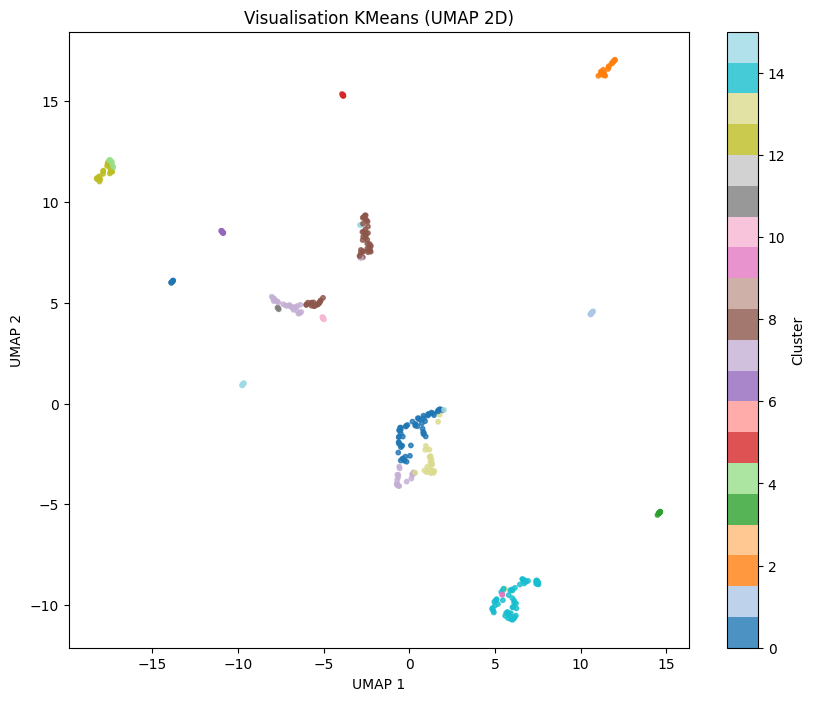

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap
from sklearn.preprocessing import MultiLabelBinarizer




target_cols = ["Species", "Dry_Clover_g", "Dry_Dead_g", "Dry_Green_g", "GDM_g", 'Pre_GSHH_NDVI', 'Height_Ave_cm']
numerical_features = ["Dry_Clover_g", "Dry_Dead_g", "Dry_Green_g", "GDM_g", 'Pre_GSHH_NDVI', 'Height_Ave_cm']


df = train_pivotted[target_cols]
df["species_list"] = df["Species"].str.split("_")
mlb = MultiLabelBinarizer()
species_encoded = mlb.fit_transform(df["species_list"])

species_columns = mlb.classes_

species_df = pd.DataFrame(
    species_encoded,
    columns=species_columns,
    index=df.index
)

df = pd.concat(
    [
        df[numerical_features],
        species_df
    ],
    axis=1
)



X_scaled = StandardScaler().fit_transform(df.values)

kmeans = KMeans(n_clusters=16, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

reducer = umap.UMAP(
    n_components=2,
    n_neighbors=10,
    min_dist=0.1,
    random_state=42
)
X_2d = reducer.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=clusters,
    cmap="tab20",
    s=10,
    alpha=0.8
)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Visualisation KMeans (UMAP 2D)")
plt.colorbar(scatter, label="Cluster")
plt.show()



In [16]:
df

,Dry_Clover_g,Dry_Dead_g,Dry_Green_g,GDM_g,Pre_GSHH_NDVI,Height_Ave_cm,BarleyGrass,Barleygrass,Bromegrass,Capeweed,...,Fescue,Lucerne,Mixed,Phalaris,Ryegrass,SilverGrass,SpearGrass,SubcloverDalkeith,SubcloverLosa,WhiteClover
0,0.0000,31.9984,16.2751,16.2750,0.62,4.6667,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.0000,0.0000,7.6000,7.6000,0.55,16.0000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,6.0500,0.0000,0.0000,6.0500,0.38,1.0000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0000,30.9703,24.2376,24.2376,0.66,5.0000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.4343,23.2239,10.5261,10.9605,0.54,3.5000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,40.0300,0.0000,0.8000,40.8300,0.73,3.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353,24.6445,4.1948,12.0601,36.7046,0.83,3.1667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,0.0000,1.1457,91.6543,91.6543,0.69,29.0000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
355,32.3575,0.0000,2.0325,34.3900,0.74,2.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.cm as cm
def plot_umap_images(
    embedding,
    images,
    clusters,
    save_path,
    zoom=0.2,
    max_images=None,
    figsize=(12, 12),
    dpi=300,
    linewidth=2
):
    """
    embedding : np.array (N, 2)
    images    : list or np.array of images (H, W, C)
    clusters  : np.array (N,) - labels KMeans
    save_path : str
    """

    assert embedding.shape[0] == len(images) == len(clusters)

    # Subsampling si nécessaire
    if max_images is not None and len(images) > max_images:
        idx = np.random.choice(len(images), max_images, replace=False)
        embedding = embedding[idx]
        images = [images[i] for i in idx]
        clusters = clusters[idx]

    # Création d'une palette de couleurs (une par cluster)
    unique_clusters = np.unique(clusters)
    cmap = cm.get_cmap("tab10", len(unique_clusters))
    cluster_to_color = {
        c: cmap(i) for i, c in enumerate(unique_clusters)
    }

    fig, ax = plt.subplots(figsize=figsize)

    ax.set_xlim(embedding[:, 0].min(), embedding[:, 0].max())
    ax.set_ylim(embedding[:, 1].min(), embedding[:, 1].max())
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("UMAP embedding with image thumbnails (colored by cluster)")

    for xy, img, c in zip(embedding, images, clusters):
        # Conversion PIL -> numpy si besoin
        if isinstance(img, Image.Image):
            img = np.array(img)

        # Normalisation si uint8
        if img.max() > 1:
            img = img / 255.0

        imagebox = OffsetImage(img, zoom=zoom)

        ab = AnnotationBbox(
            imagebox,
            xy,
            frameon=True,
            bboxprops=dict(
                edgecolor=cluster_to_color[c],
                linewidth=linewidth
            )
        )
        ax.add_artist(ab)

    plt.tight_layout()
    plt.savefig(save_path, dpi=dpi)
    plt.close()

    print(f"Plot saved to {save_path}")


images = []
for i in range(150):
    img = Image.open(train_pivotted['image_path'].iloc[i])
    img_resized = img.resize((100, 100), resample=Image.BILINEAR)
    images.append(img)

plot_umap_images(
    X_2d[:150],
    images,
    clusters[:150],
    "plot.png",
    zoom=0.03,
    max_images=None,
    figsize=(12, 12),
    dpi=300
)

NameError: name 'X_2d' is not defined

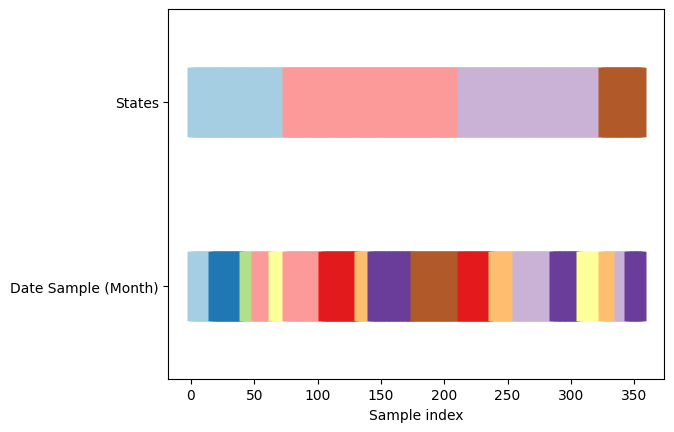

In [21]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
from sklearn.preprocessing import LabelEncoder

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Date Sample (Month)", "States"],
        xlabel="Sample index",
    )



train_pivotted = train_pivotted.sort_values("State").reset_index(drop=True)
train_pivotted["Sampling_Date"] = pd.to_datetime(
    train_pivotted["Sampling_Date"]
)

train_pivotted["Sampling_Date"] = train_pivotted["Sampling_Date"].dt.month
state_order = sorted(train_pivotted["State"].unique())

train_sorted = (
    train_pivotted
    .assign(
        State=pd.Categorical(
            train_pivotted["State"],
            categories=state_order,
            ordered=True
        )
    )
    .sort_values(["State", "Sampling_Date"])
    .reset_index(drop=True)
)


visualize_groups(
    classes=train_sorted["State"].cat.codes,
    groups=train_sorted["Sampling_Date"].astype("category").cat.codes,
    name="Ordered by State → Sampling Date"
)

<Axes: title={'center': 'StratifiedGroupKFold'}, xlabel='Sample index', ylabel='CV iteration'>

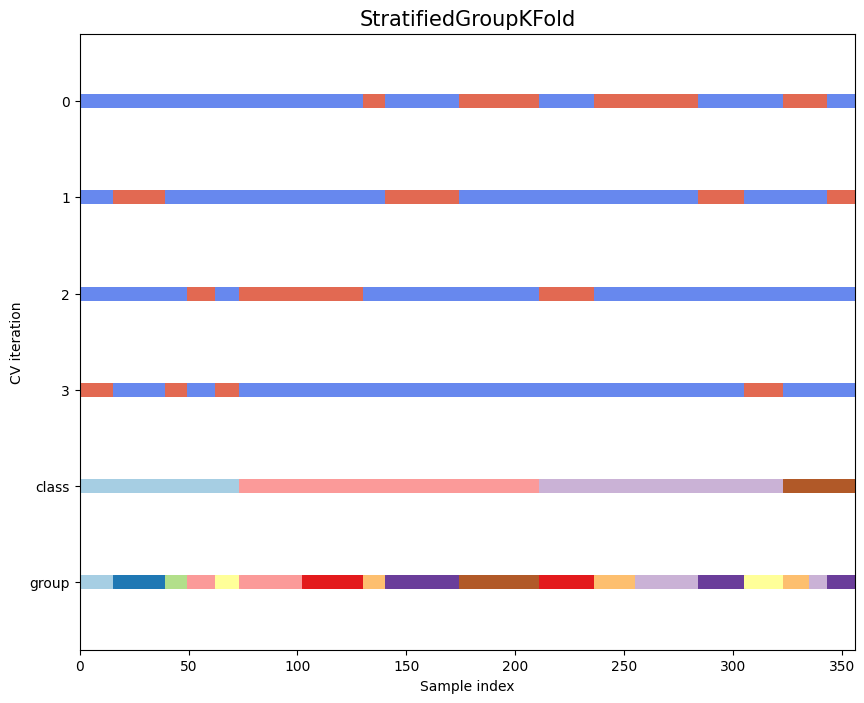

In [39]:
from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    StratifiedGroupKFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
)

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""
    use_groups = "Group" in type(cv).__name__
    groups = group if use_groups else None
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=groups)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["State", "Sampling Date"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 356],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

n_splits = 4
fig, ax = plt.subplots(figsize = (10,8))
cv = StratifiedGroupKFold(n_splits, shuffle = True, random_state = 42)
plot_cv_indices(cv, train_sorted.drop(columns = ['State', 'Sampling_Date']), train_sorted["State"].cat.codes, train_sorted["Sampling_Date"].astype("category").cat.codes, ax, n_splits)

In [10]:
train_pivotted['Sampling_Date'].unique()

array(['2015/9/4', '2015/4/1', '2015/9/1', '2015/5/18', '2015/9/11',
       '2015/9/30', '2015/7/2', '2015/6/30', '2015/5/19', '2015/9/29',
       '2015/1/15', '2015/6/26', '2015/11/9', '2015/2/24', '2015/8/19',
       '2015/6/29', '2015/5/7', '2015/8/14', '2015/8/21', '2015/8/18',
       '2015/7/1', '2015/11/10', '2015/10/13', '2015/10/6', '2015/2/25',
       '2015/7/8', '2015/10/14', '2015/9/3'], dtype=object)

In [11]:
np.mean([0.6337588584816107, 0.7755338659490214, 0.6636895948301502, 0.5191665453935996])

0.6480372161635954